# ------------------------------- Car Price Prediction -----------------------------------

## Importing the required libraries

In [140]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')



## Importing the dataset

In [141]:
cars_data = pd.read_csv("car_price_assignment.csv")

cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Analyzing the dataset

In [142]:
cars_data.shape

(205, 26)

In [143]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [144]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning

In [145]:
cars_data.duplicated(subset = ['car_ID']).sum()

0

In [146]:
cars_data = cars_data.drop(['car_ID'], axis =1)

In [147]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [148]:
cars_data['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

#### The 'symboling' column is represented as the insurance risk rating i.e; +3 indicates that the auto is risky, -3 that it is probably pretty safe.   

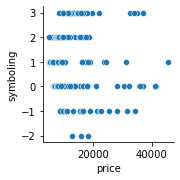

In [149]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)

In [150]:
cars_data['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

#### From the above data we can infer that the car name comprises of two parts i.e; the car company and the car model. 

In [151]:
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0])

In [152]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [153]:
cars_data = cars_data.drop(['CarName'], axis =1)

In [154]:
cars_data['car_company'].value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

#### From the above data we can see that some of car_company names has been misspelled. Hence we need to fix it.

In [155]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [156]:
cars_data['car_company'].value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [157]:
cars_data['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [158]:
cars_data['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [159]:
cars_data['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

#### Converting the doornumber variable into numeric variable

In [160]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [161]:
cars_data['doornumber'].value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [162]:
cars_data['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [163]:
cars_data['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [164]:
cars_data['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [165]:
cars_data['wheelbase'].value_counts().head()

wheelbase
94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: count, dtype: int64

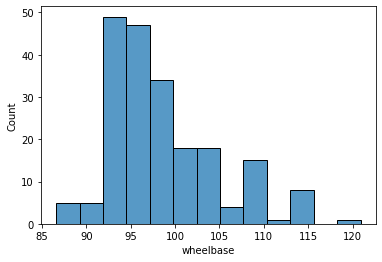

In [166]:
sns.histplot(cars_data['wheelbase'])
plt.show()

In [167]:
cars_data['carlength'].value_counts().head()

carlength
157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: count, dtype: int64

In [ ]:
sns.histplot(cars_data['carlength'])
plt.show()

In [ ]:
cars_data['enginetype'].value_counts()

In [ ]:
cars_data['cylindernumber'].value_counts()

#### We need to convert this categorical variable into numerical variable. 

In [ ]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [ ]:
cars_data['cylindernumber'].value_counts()

In [ ]:
cars_data['fuelsystem'].value_counts()

# Data Visualization

In [ ]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

In [ ]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

### Since there are a lot of columns in the dataset, we can't find out the correlation using the above plot between the variables. So for this we need to plot heatmap.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = cars_data.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()


### From the above plot we can infer the following data;

#### Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

#### Price is negatively correlated to symboling, citympg and highwaympg.

#### Also the cars having high mileage may fall in the 'economy' cars category, and are priced lower.

#### There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [ ]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)

In [ ]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)

1. From the price boxplot it is clear that the car companys with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
2. Whereas the lower priced cars belong to chevrolet
3. The median price of gas vehicles is lower than that of Diesel Vehicles.
4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles. 
5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of two-door vehicles. 
6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.
7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
8. Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
9. The median cost of eight cylinder vehicles is higher than other cylinder categories.
10. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are also some outliers on the higher price side having MPFI systems.
11. Vehicles with OHCV engine type falls under higher price range.

# Data Preprocessing

In [ ]:
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

In [ ]:
car_df  = pd.concat([cars_data, cars_dummies], axis =1)

In [ ]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [ ]:
car_df.info()

## Performing the train_test_split operation 

In [ ]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.shape

In [ ]:
df_test.shape

## Scaling the data using StandardScaler()

In [ ]:
cars_numeric.columns

In [ ]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [ ]:
scaler = StandardScaler()

In [ ]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [ ]:
df_train.describe()

# Model Building

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

## Performing feature selection using Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming lr is defined as the LinearRegression model
lr = LinearRegression()

# Initialize RFE with estimator (lr) and the number of features to select (15)
rfe = RFE(estimator=lr, n_features_to_select=15)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)


In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
cols = X_train.columns[rfe.support_]
cols

## Model 1

In [ ]:
print(X1_sm.dtypes)
print(y_train.dtype)


In [ ]:
X1 = X1.astype(float)


In [ ]:
# Drop any rows with NaNs in X1 or y_train
combined = pd.concat([X1, y_train], axis=1).dropna()
X1_clean = combined.drop(columns=y_train.name)
y_clean = combined[y_train.name]

# Add constant
X1_sm = sm.add_constant(X1_clean)

# Fit the model
lr_1 = sm.OLS(y_clean, X1_sm).fit()
print(lr_1.summary())


In [ ]:
X1 = pd.get_dummies(X_train[cols], drop_first=True)

# Convert all columns to float (required for statsmodels OLS)
X1 = X1.astype(float)

# Ensure y_train is numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# Remove rows with NaN values in y_train
valid_idx = y_train.notna()
X1 = X1.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# Add constant (intercept)
X1_sm = sm.add_constant(X1)

# Fit the model
lr_1 = sm.OLS(y_train, X1_sm).fit()

# Show summary
print(lr_1.summary())


In [ ]:
print(lr_1.summary())

#### All the p- values are significant. Let us check VIF.

In [ ]:
X1 = X1.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
X1 = X1.fillna(X1.median())  # Replace NaN values with the median of each column


In [ ]:
X1 = X1.astype(int)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

print(vif)


#### VIF is Variance Inflation factor. quantifies the extent of correlation between one predictor and the other predictors in a model. It is used for diagnosing collinearity/multicollinearity. We see that there are a few variables which have an infinite/large VIF. These variables aren't of use. But manual elimination is time consuming and makes the code unnecessarily long. So let's try and build a model with 10 features this time using RFE.

### Now building the model with 10 variables.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
rfe2 = RFE(estimator=lr2, n_features_to_select=10)  # Correct initialization
rfe2.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe2.support_]
print(selected_features)


In [ ]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

In [ ]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols

## Model 2

In [105]:
# Assuming X2 is already defined (like a new set of features or filtered from X_train)
X2 = pd.get_dummies(X_train[cols], drop_first=True)  # or however you define X2
X2 = X2.astype(float)

# Remove any rows where y_train is NaN
valid_idx = y_train.notna()
X2 = X2.loc[valid_idx]
y_train_clean = y_train.loc[valid_idx].astype(float)  # safer to copy y_train into a clean variable

# Add constant (intercept)
X2_sm = sm.add_constant(X2)
X2_sm = X2_sm.astype(float)

# Fit the model
model_2 = sm.OLS(y_train_clean, X2_sm).fit()

# Show summary
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.59e-64
Time:                        11:58:36   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [106]:
import statsmodels.api as sm

# Fit the model
model_2 = sm.OLS(y_train, X2_sm).fit()

# Summary of the regression results
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.59e-64
Time:                        11:58:40   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [107]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.59e-64
Time:                        11:58:42   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Now let us check the VIF for this model.

In [108]:
non_numeric_cols = X2.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:\n", non_numeric_cols)


Non-numeric columns:
 Index([], dtype='object')


In [109]:
for col in ['enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
            'enginetype_rotor', 'car_company_bmw', 'car_company_peugeot',
            'car_company_renault', 'car_company_subaru']:
    X2[col] = pd.to_numeric(X2[col], errors='coerce')


In [110]:
import pandas as pd
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Make sure all columns are numeric
X2 = X2.apply(pd.to_numeric, errors='coerce')

# Step 2: Drop any rows with NaNs (if any values failed coercion)
X2 = X2.dropna()

# Step 3: Double check no non-numeric dtypes remain
print(X2.dtypes)

# Step 4: Add constant and convert to numpy array of type float
X2_const = add_constant(X2)
X2_const = X2_const.astype(float)  # Force float type to avoid TypeError

# Step 5: Calculate VIF
vif = pd.DataFrame()
vif["Features"] = X2_const.columns
vif["VIF"] = [variance_inflation_factor(X2_const.values, i) for i in range(X2_const.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

print(vif.sort_values(by="VIF", ascending=False))


carwidth                  float64
enginesize                float64
compressionratio          float64
fueltype_gas              float64
enginelocation_rear       float64
enginetype_l              float64
enginetype_ohcf           float64
enginetype_rotor          float64
fuelsystem_idi            float64
car_company_bmw           float64
car_company_mazda         float64
car_company_mitsubishi    float64
car_company_peugeot       float64
car_company_renault       float64
car_company_subaru        float64
dtype: object
                  Features    VIF
4             fueltype_gas    inf
5      enginelocation_rear    inf
7          enginetype_ohcf    inf
9           fuelsystem_idi    inf
15      car_company_subaru    inf
3         compressionratio  42.32
13     car_company_peugeot   9.73
6             enginetype_l   8.99
1                 carwidth   3.38
2               enginesize   3.30
8         enginetype_rotor   1.55
11       car_company_mazda   1.50
12  car_company_mitsubishi   1.20


#### As we see, still there are columns with high VIF. Let us drop column car_company_subaru.

## Model 3

In [112]:
X3 = pd.get_dummies(X_train[cols], drop_first=True)  # or however you're defining X3
X3 = X3.astype(float)

# Clean y_train (remove NaNs)
valid_idx = y_train.notna()
X3 = X3.loc[valid_idx]
y_train_clean = y_train.loc[valid_idx].astype(float)

# Add constant to X3
X3_sm = sm.add_constant(X3)
X3_sm = X3_sm.astype(float)

# Fit the model
model_3 = sm.OLS(y_train_clean, X3_sm).fit()
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.59e-64
Time:                        11:59:21   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [113]:
print(X3_sm.dtypes)
print(y_train.dtypes)


const                     float64
carwidth                  float64
enginesize                float64
compressionratio          float64
fueltype_gas              float64
enginelocation_rear       float64
enginetype_l              float64
enginetype_ohcf           float64
enginetype_rotor          float64
fuelsystem_idi            float64
car_company_bmw           float64
car_company_mazda         float64
car_company_mitsubishi    float64
car_company_peugeot       float64
car_company_renault       float64
car_company_subaru        float64
dtype: object
float64


In [115]:
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.59e-64
Time:                        12:00:05   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [116]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check the data types of X3
print("Data types of X3 columns:")
print(X3.dtypes)

# Convert all columns to numeric, forcing errors to NaN
X3 = X3.apply(pd.to_numeric, errors='coerce')

# Check for any NaN values after conversion
print("\nNumber of NaN values per column:")
print(X3.isna().sum())

# Handle NaN values by replacing them with the column mean
X3.fillna(X3.mean(), inplace=True)

# Check for any infinite values
print("\nNumber of infinite values per column:")
print(np.isinf(X3).sum())

# Replace infinite values with NaN and then fill them with the column mean
X3.replace([np.inf, -np.inf], np.nan, inplace=True)
X3.fillna(X3.mean(), inplace=True)

# Check again for NaN values
print("\nFinal check for NaN values after replacements:")
print(X3.isna().sum())

# Ensure that X3 only contains numeric columns
X3_numeric = X3.select_dtypes(include=[np.number])

# Check that the data now only contains numeric columns
print("\nData types after selecting numeric columns:")
print(X3_numeric.dtypes)

# Now calculate the Variance Inflation Factor (VIF) using only numeric columns
vif = pd.DataFrame()
vif['Features'] = X3_numeric.columns
vif['VIF'] = [variance_inflation_factor(X3_numeric.values, i) for i in range(X3_numeric.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Sort VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

print("\nVariance Inflation Factors:")
print(vif)


Data types of X3 columns:
carwidth                  float64
enginesize                float64
compressionratio          float64
fueltype_gas              float64
enginelocation_rear       float64
enginetype_l              float64
enginetype_ohcf           float64
enginetype_rotor          float64
fuelsystem_idi            float64
car_company_bmw           float64
car_company_mazda         float64
car_company_mitsubishi    float64
car_company_peugeot       float64
car_company_renault       float64
car_company_subaru        float64
dtype: object

Number of NaN values per column:
carwidth                  0
enginesize                0
compressionratio          0
fueltype_gas              0
enginelocation_rear       0
enginetype_l              0
enginetype_ohcf           0
enginetype_rotor          0
fuelsystem_idi            0
car_company_bmw           0
car_company_mazda         0
car_company_mitsubishi    0
car_company_peugeot       0
car_company_renault       0
car_company_subaru      

#### Droppping the column enginetype_ohcf.

## Model 4

In [118]:
# Step 1: Create X4 (your feature set)
X4 = pd.get_dummies(X_train[cols], drop_first=True)

# Step 2: Add constant for intercept
X4_sm = sm.add_constant(X4)

# Step 3: Convert boolean columns to integers (0/1)
X4_sm = X4_sm.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Step 4: Convert everything to float (recommended for statsmodels)
X4_sm = X4_sm.astype(float)

# Step 5: Clean y_train (remove NaNs)
valid_idx = y_train.notna()
X4_sm = X4_sm.loc[valid_idx]
y_train_clean = y_train.loc[valid_idx].astype(float)

# Step 6: Fit model
model_4 = sm.OLS(y_train_clean, X4_sm).fit()

# Step 7: Show summary
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.59e-64
Time:                        12:00:47   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [119]:
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.59e-64
Time:                        12:00:50   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [120]:
# Convert all boolean columns to integers (if any)
X4 = X4.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Make sure all values are finite (no NaN or inf)
if not np.isfinite(X4.values).all():
    print("X4 contains NaN or inf values. Please check your data.")
else:
    # Proceed with VIF calculation
    vif = pd.DataFrame()
    vif['Features'] = X4.columns
    vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)


                  Features    VIF
4      enginelocation_rear    inf
6          enginetype_ohcf    inf
14      car_company_subaru    inf
2         compressionratio  42.32
8           fuelsystem_idi  41.28
12     car_company_peugeot   9.73
5             enginetype_l   8.99
3             fueltype_gas   4.60
0                 carwidth   3.38
1               enginesize   3.30
7         enginetype_rotor   1.55
10       car_company_mazda   1.50
11  car_company_mitsubishi   1.20
9          car_company_bmw   1.12
13     car_company_renault   1.01


#### VIF for car_company_peugeot is still high. Let us drop this column and rebuild the model.

## Model 5

In [121]:
X5 = X4.drop(['car_company_peugeot'], axis =1)
X5_sm = sm.add_constant(X5)

Model_5 = sm.OLS(y_train,X5_sm).fit()

In [122]:
print(Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     108.5
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.41e-61
Time:                        12:00:56   Log-Likelihood:                -31.357
No. Observations:                 143   AIC:                             88.71
Df Residuals:                     130   BIC:                             127.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [123]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
13,car_company_subaru,inf
2,compressionratio,41.50
8,fuelsystem_idi,40.36
3,fueltype_gas,4.54
1,enginesize,3.25
0,carwidth,3.18
7,enginetype_rotor,1.55
10,car_company_mazda,1.50


#### Let us drop the column enginetype_1

## Model 6

In [124]:
X6 = X5.drop(['enginetype_l'], axis =1)
X6_sm = sm.add_constant(X6)

Model_6 = sm.OLS(y_train,X6_sm).fit()

In [125]:
print(Model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     114.0
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.79e-61
Time:                        12:01:01   Log-Likelihood:                -34.277
No. Observations:                 143   AIC:                             92.55
Df Residuals:                     131   BIC:                             128.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [126]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
5,enginetype_ohcf,inf
12,car_company_subaru,inf
2,compressionratio,38.38
7,fuelsystem_idi,36.00
3,fueltype_gas,4.49
1,enginesize,3.15
0,carwidth,3.11
6,enginetype_rotor,1.55
9,car_company_mazda,1.47


#### All the VIF & p values seem to be in good range.

# Residual Analysis

In [127]:
y_train_pred = Model_6.predict(X6_sm)
y_train_pred.head()

122   -0.750524
125    0.669628
166   -0.717170
1     -0.265974
199    0.349353
dtype: float64

In [128]:
Residual = y_train- y_train_pred

<AxesSubplot:ylabel='Count'>

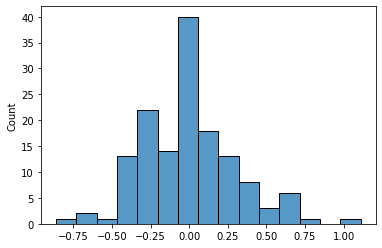

In [129]:
sns.histplot(Residual, bins =15)

### Now we need to make predictions on our model.

In [130]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [131]:
y_test = df_test.pop('price')
X_test = df_test

In [132]:
final_cols = X6.columns

In [133]:
import statsmodels.api as sm

# Check the columns of X_test
print(X_test.columns)

# Add a constant column if it's missing
if 'const' not in X_test.columns:
    X_test = sm.add_constant(X_test)

# Now select the columns from X_test using final_cols
X_test_model6 = X_test[final_cols]
X_test_model6.head()


Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercury',
       'car_company_mitsubishi', 'car_company_nissan', 'car_compan

,carwidth,enginesize,compressionratio,fueltype_gas,enginelocation_rear,enginetype_ohcf,enginetype_rotor,fuelsystem_idi,car_company_bmw,car_company_mazda,car_company_mitsubishi,car_company_renault,car_company_subaru
160,-0.652569,-0.660242,-0.278345,True,False,False,False,False,False,False,False,False,False
186,-0.154030,-0.390836,-0.278345,True,False,False,False,False,False,False,False,False,False
59,0.299187,-0.072447,-0.384120,True,False,False,False,False,False,True,False,False,False
165,-0.833856,-0.660242,-0.172569,True,False,False,False,False,False,False,False,False,False
140,-0.924500,-0.415328,-0.357676,True,False,True,False,False,False,False,False,False,True


In [134]:
X_test_sm = sm.add_constant(X_test_model6)

In [135]:
y_pred = Model_6.predict(X_test_sm)

In [136]:
y_pred.head()

160   -0.624239
186   -0.300439
59    -0.139827
165    -0.71717
140   -0.757524
dtype: object

Text(0, 0.5, 'y_pred')

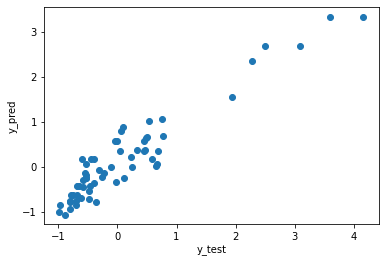

In [137]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

#### Though the model is performing better at the beginning, still there are few high values which the model is not able to explain.

# Model Evaluation

In [138]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8944694345909372

## The variables which are significant in predicting the price of a car are: 

### enginesize, carwidth, enginetype_rotor, car_company_bmw, enginelocation_rear, car_company_renault

In [139]:
!jupyter nbconvert --to script car_price_prediction.ipynb


[NbConvertApp] Converting notebook car_price_prediction.ipynb to script
[NbConvertApp] Writing 19709 bytes to car_price_prediction.py
